In [116]:
import torch
from torch import nn
import random as rand
import matplotlib.pyplot as plt

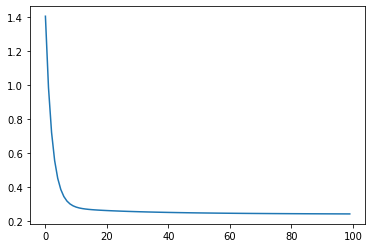

In [156]:
# https://towardsdatascience.com/lstms-in-pytorch-528b0440244
# https://github.com/IHCA-Coding-to-Prevent-Coding/ML-SampleNeuralNet/blob/main/sampleneuralnet.py


inputSize=10 
hiddenSize=1 # nodes of hidden layer
outSize=1
batchSize=100 # how many data points are in batch
lr = 0.1
seqLength=1 # related to time, how many different times data within single point represents I think

#testing data
testing = torch.randn(batchSize, seqLength, inputSize)
truth = (torch.rand(size=(batchSize, 1)) < 0.5).float()

class extractTensor(nn.Module):
    def forward(self, x):
        tensor, hs = x
        return tensor.reshape(-1, hiddenSize) 

model = nn.Sequential(
    nn.LSTM(inputSize, hiddenSize),
    extractTensor(),
    nn.Linear(hiddenSize, outSize)
)

def lossFunc(date=testing, comparison=truth, model=model):
    prediction = model(testing)

    MSEloss = torch.nn.MSELoss()
    output = MSEloss(prediction, comparison)
    
    return output

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

lossList = []
for i in range(100):
    loss = lossFunc()
    lossList.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(lossList)